# Poly Linear Regression

Problem statement: You're a recruiter, you found a great recruit, but he's asking for a lot of money (160k), because that's what he claims he earned in the previous company. Problem is, we need to double check if this is a bluff, so we develop a polynomial regression model using data available on google and linkedin to predict his previous salary and really see if this is a bluff or not. He previously was a region manager for 2 years, so it'll be slightly more than the starting salary for that position. 

What we'll do is, we'll consider his position as 6.5, i.e. between 6 and 7, where his salary will lie. We'll predict for position 6.5 and see if his salary was really around 160k.

### Form:
y = b0 + b1x1 + b2x1^2 + ...
Notice that the variable is the same, but has different weightages depending on the exponent and coefficient. This is basically for curve predictions rather than linear regressions. 

These are used to predict things like disease spreads across a country etc.

Why's it still called "Polynomial *linear* regression"? We are talking about the coefficients when we say "linear", and since the function can be expressed as a linear combination of the coefficients, that's why it's linear. 

This is basically an alternate version of multi-linear regression

#### Standard steps

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

END = "\n-------------------------------------\n"

In [3]:
# Importing the dataset
df = pd.read_csv('Position_Salaries.csv')
x = df.iloc[:, 1:-1].values # We don't care about the position name, just the level number, so we excluded the position. 
y = df.iloc[:, -1].values # Y is the dependent variable, i.e. the salary

#### Here on out, we're going to do a linear regression vs polynomial regression comparison to see why exactly we do polynomial regression here.

In [6]:
# Since dataset is small, we'll just train on the entire dataset.

# Linear regression on the dataset:
lin_reg = LinearRegression()
lin_reg.fit(x, y)

# Polynomial regression on the dataset:
poly_reg = PolynomialFeatures(degree = 4) # We'll use a 2nd degree poly for now
x_poly = poly_reg.fit_transform(x) # This will transform x into a matrix of x, x^2, x^3, etc.
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression()

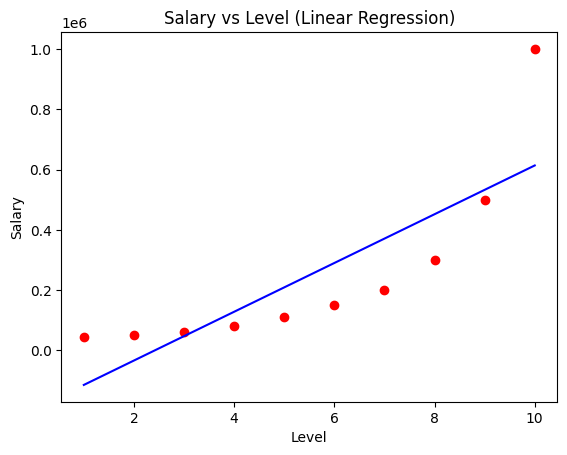

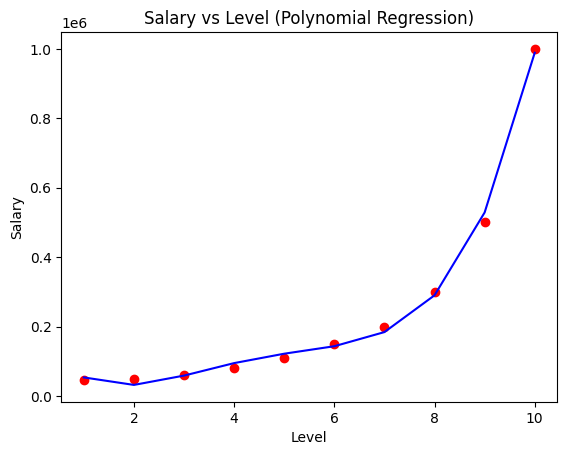

In [7]:
# Now we visualize the results from both.

# Linear regression visualization
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('Salary vs Level (Linear Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

# Polynomial regression visualisation
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(x_poly), color = 'blue')
plt.title('Salary vs Level (Polynomial Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

Here clearly there's overfitting, but that's okay only in this case because we need a single prediction at level 6.5 or so. Otherwise, big time mishap, need to reduce the exponent

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3
 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1
 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


C:\Users\hifia\AppData\Local\Temp\ipykernel_6520\3633088596.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x), max(x), 0.1)


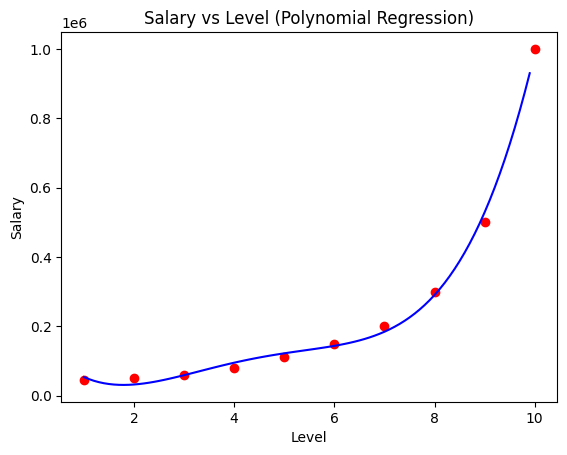

In [10]:
# Cleaner curve: (Not really needed out there in real life)
x_grid = np.arange(min(x), max(x), 0.1)
print(x_grid)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, lin_reg_2.predict(poly_reg.fit_transform(x_grid)), color = 'blue')
plt.title('Salary vs Level (Polynomial Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [12]:
# Now predicting salary for position 6.5
print(lin_reg.predict([[6.5]]), lin_reg_2.predict(poly_reg.fit_transform([[6.5]])))


[330378.78787879] [158862.45265155]


Clearly, the correct prediction is 158k dollars, meaning the person's claim was accurate, so he definitely deserves 160k. 